<a href="https://colab.research.google.com/github/JoaoDiniz409/classifica-o_imagens_mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as Bibliotecas
import tensorflow as tf # Biblioteca para redes neurais
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

### Importando o dataset: MNIST
Dataset MNIST ( Modified National Institute of Standards and database ) é um grande banco de dados de dígitos manuscritos que é comumente usado para treinar vários sistemas de processamento de imagem.

In [ ]:
mnist_b = tf.keras.datasets.mnist

In [ ]:
# lendo a dataset
data_mnist = mnist_b.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
type(data_mnist)

tuple

In [ ]:
len(data_mnist)

2

In [ ]:
data_mnist[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
len(data_mnist[0])

2

In [ ]:
len(data_mnist[0][0])

60000

In [ ]:
data_mnist[0][1].shape

(60000,)

In [ ]:
data_mnist[0][0].shape

(60000, 28, 28)

In [ ]:
data_mnist[1][0].shape

(10000, 28, 28)

In [ ]:
data_mnist[1][1].shape

(10000,)

In [ ]:
# (dados_treino, dados_teste) = fashion_mist.load_data()
(imagens_treino, lebels_treino), (imagens_teste, lebels_teste) = mnist_b.load_data()

### Explorando os dados

In [ ]:
imagens_treino.shape

(60000, 28, 28)

In [ ]:
lebels_treino.shape

(60000,)

In [ ]:
imagens_teste.shape

(10000, 28, 28)

In [ ]:
lebels_teste.shape

(10000,)

In [ ]:
# Quantidade de classes diferentes nas lebels
np.unique(lebels_treino)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Pré-processamento de dados

<function matplotlib.pyplot.show>

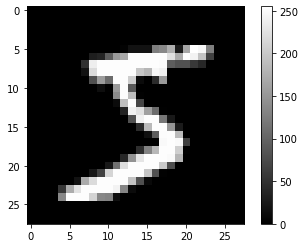

In [ ]:
# Visualizando a primeira imagem do conjunto de treinamento
plt.figure
plt.imshow(imagens_treino[0], cmap = "gray")
plt.colorbar()
plt.show

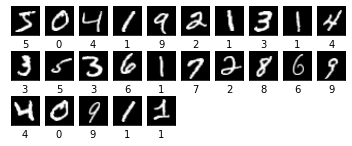

In [ ]:
# Imprimir as 25 primeiras imagens, em um quadro de 5 por 10 imagens 
plt.figure

for i in range(25):
  plt.subplot(5, 10, i+1)
  plt.imshow(imagens_treino[i], cmap="gray")
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(lebels_treino[i]) # Mesmo indices de imagen
plt.show()

### Criando o modelo de Deep Learning

Um modelo de Deep Learning usa uma rede neural artificial. A rede neural artificial possui neurônios organizados em camadas. Devemos definir quantas camadas e quantos neurônios por camada teremos no nosso modelo. Vamos utilizar o módulo keras dentro do Tensorflow

In [ ]:
model_rede_artificial = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(10)
])

In [ ]:
model_rede_artificial.compile(optimizer="adam",
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                              metrics=["accuracy"]
)

### Treinando o modelo rede neural artificial com o conjunto de treinamento (60 mil imagens e labels)

In [ ]:
model_rede_artificial.fit(x=imagens_treino, y=lebels_treino, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.4188 - accuracy: 0.8565
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3751 - accuracy: 0.9109
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2798 - accuracy: 0.9292
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2508 - accuracy: 0.9365
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2316 - accuracy: 0.9428
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2212 - accuracy: 0.9446
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1965 - accuracy: 0.9495
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1927 - accuracy: 0.9526
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1924 - accuracy: 0.9531
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.18

Avaliando a performance do conjunto de teste

In [ ]:
test_loos, test_accuracy = model_rede_artificial.evaluate(imagens_teste, lebels_teste)
print(f"Accuracia do modelo conjunto de teste: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2845 - accuracy: 0.9455
Accuracia do modelo conjunto de teste: 0.9455000162124634


Criando uma matriz de confusão dos resultados da rede neural artificial 

[Text(69.0, 0.5, 'Classes real'), Text(0.5, 24.0, 'Classes previsão')]

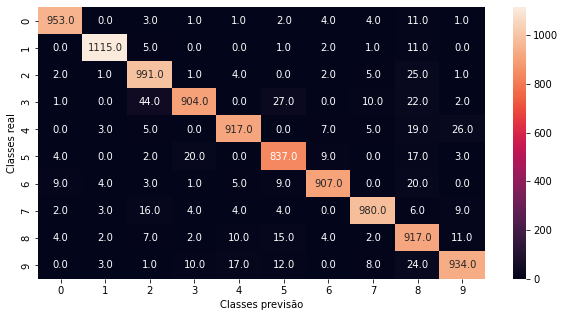

In [ ]:
previsoes_rna = np.argmax(model_rede_artificial.predict(imagens_teste), axis=-1)

matriz_confusao = confusion_matrix(lebels_teste, previsoes_rna)


plt.figure(figsize=(10,5))
p = sns.heatmap(matriz_confusao, annot=True, fmt=".1f")
p.set( xlabel = "Classes previsão", ylabel = "Classes real")


### Avaliação dos resultados da matriz de confusão da rede neural artificial: 
* Acurácia alcançada após do treinamendo do modelo da rede neural artificial foi aproximadamente 94% de precisão.

* As 6 maiores combinações que tiveram mais erro:
  * 4 = 9: errou 50 vezes 
  * 7 = 9: errou 38 vezes 
  * 5 = 8: errou 28 vezes
  * 5 = 9: errou 27 vezes
  * 5 = 3: errou 26 vezes
  * 7 = 2: errou 26 vezes

==================================================================================================================

* Após analisar a matriz de confusão da rede neural artificial podemos ver que o número que mais teve erro foi o 5 tendo a taxa de acerto de 793 a menor entre demais, tendo os maiores erros confundindo 5 por 8 que teve 28 erros, com 9 que teve 27 erros e com 3 tendo 26 erros. 

* O segundo número que teve mais erros foi o 4 tendo a taxa de acerto de 894, tendo os maiores erros confundindo 4 por 9 que teve 50 erros sendo o maior número de erros em um unico par da matriz de confusão e confundindo 4 por 8 que foi 19 erros.

* O terceiro número que teve mais erros coloquei como 7 mesmo tendo uma taxa de acerto de 942 que é maior que a taxta do 8, porque o modelo confudiu o 7 com 9 que tev 38 erros só perdendo para 4 que confundiu com 9 que foi 50 vezes e ainda confundiu 7 com 2 que teve 26 vezes   

* Assim, podemos criar uma hipótese que o 5 dependendo de como ele é escrito pode se parecer com os números 8, 9, 3 acima fazendo com o que o modelo se confunda, não só o 5 como 7 com 9, 2 e como o 4 com 9 que foi o par que teve mais erros.

Um modelo de Deep Learning usa uma rede neural convolucional. 

In [ ]:
model_rede_convolucional = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu",
                                                           input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPool2D(2, 2), 
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model_rede_convolucional.compile(optimizer="adam",
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                              metrics=["accuracy"]
)

### Treinando o modelo rede neural convuluocional com o conjunto de treinamento (60 mil imagens e labels)

In [ ]:
model_rede_convolucional.fit(x=imagens_treino, y=lebels_treino, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 89s 47ms/step - loss: 0.2706 - accuracy: 0.9523
Epoch 2/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0630 - accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0478 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0404 - accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0324 - accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0288 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0282 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0210 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 86s 46ms/step - lo

Avaliando a performance do conjunto de teste

In [ ]:
test_loos, test_accuracy = model_rede_convolucional.evaluate(imagens_teste, lebels_teste)
print(f"Accuracia do modelo conjunto de teste: {test_accuracy}")

  5/313 [..............................] - ETA: 4s - loss: 0.1925 - accuracy: 0.9750 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 5s 14ms/step - loss: 0.0642 - accuracy: 0.9883
Accuracia do modelo conjunto de teste: 0.9883000254631042


Criando uma matriz de confusão

[Text(69.0, 0.5, 'Classes real'), Text(0.5, 24.0, 'Classes previsão')]

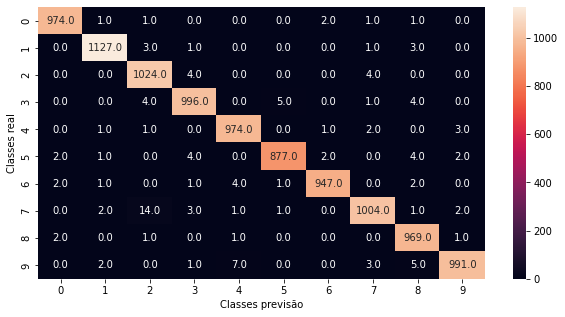

In [ ]:
previsoes_rnc = np.argmax(model_rede_convolucional.predict(imagens_teste), axis=-1)

matriz_confusao = confusion_matrix(lebels_teste, previsoes_rnc)


plt.figure(figsize=(10,5))
p = sns.heatmap(matriz_confusao, annot=True, fmt=".1f")
p.set( xlabel = "Classes previsão", ylabel = "Classes real")

### Avaliação dos resultados da matriz de confusão da rede neural convolucional: 
* Acurácia alcançada após do treinamendo do modelo da rede neural convolucional foi aproximadamente 98% de precisão.

* As 3 maiores combinações que tiveram mais erro:
  * 4 = 9: 8 erros 
  * 5 = 3: 6 erros 
  * 8 = 0: 5 erros


==================================================================================================================

* Após analisar a matriz de confusão da rede neural convolucional pode ver que a taxa de erros não passa de 10. Assim, os 3 números que tiveram mais erros seriam o 4 que é confundido por 9 que teve 8 erros, logo apos teria o 5 que é confundido por 3 que teve 6 erros e por ultimo teriamos o número 8 que é confundido por 0 que tem 5 erros.



## Conclusão

* Após ver os 2 resultados dos modelos apresentados nessa análise sendo um modelo de rede neural artifical e outro modelo de rede neural convolucional, que teve resultados melhores na acurácia do modelo pelo fato da convolucional filtrar as imagens antes de treinar a rede neural, podendo assim as características das imagens podem ser destacadas aumentando a texa de acerto.

* Exemplo: Na rede neural artifical o número 4 foi classificado como 9 umas 50 vezes em comparação na rede neural convolucional que classificou 4 como sendo 9 só 8 vezes.

* Portanto o modelo que sera usado é rede neural convolucional.